In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import LogFormatterExponent, FuncFormatter

ZF_ALL = np.load('fits/ZFOURGE_TOTAL.npz', allow_pickle=True)

lum = ZF_ALL['x']
phi = ZF_ALL['y']
phi_err = ZF_ALL['e']
saunder_params = ZF_ALL['saunder_p']
saunder_sigmas = ZF_ALL['s']
print(ZF_ALL.files)

def saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

['x', 'y', 'e', 'z', 'm', 's', 'schech_p', 'saunder_p', 'schech_e', 'saunder_e', 'schech_f', 'saunder_f']


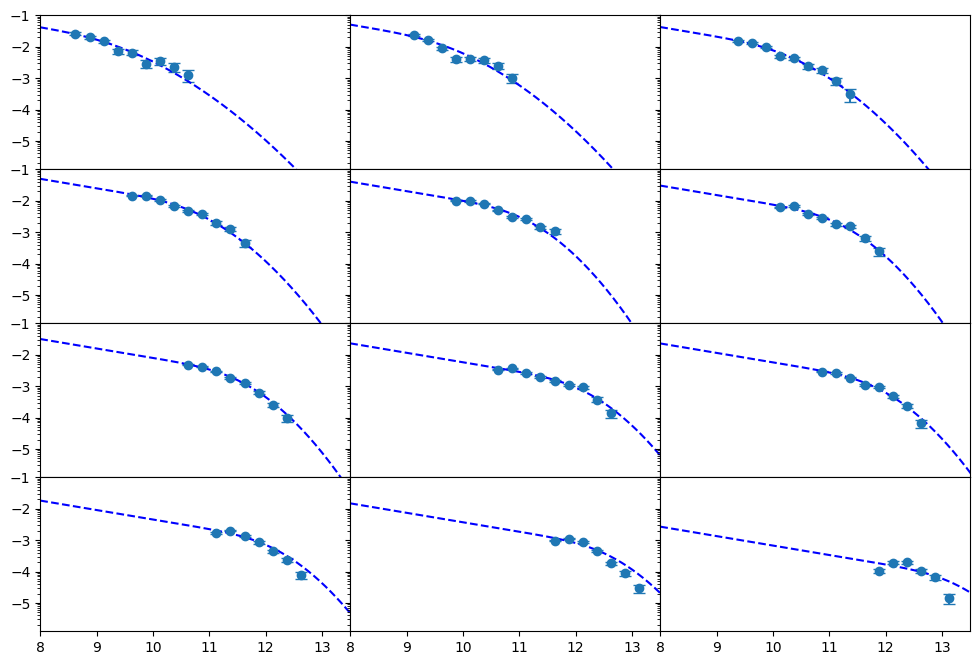

In [62]:
fig, axes = plt.subplots(4, 3, figsize=(12,8), sharex=True, sharey=True)
axes = axes.flatten()
long_l = np.logspace(8, 14, 1000)

for ax, l, p, e, sp, s in zip(axes, lum, phi, phi_err, saunder_params, saunder_sigmas):
    ax.errorbar(l, p, yerr=e, fmt='o', capsize=4)
    ax.plot(np.log10(long_l), saunders_luminosity(long_l, *sp, s), color='blue', linestyle='--')

plt.xlim(8, 13.5)
plt.ylim(10**-5.9, 10**-1)
plt.yscale('log', nonpositive='clip')
plt.gca().yaxis.set_major_formatter(LogFormatterExponent(base=10))
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()